# 汽车燃料效率建模

## 数据准备

In [2]:
!aria2c --quiet http://labfile.oss.aliyuncs.com/courses/1029/mpg.csv
%ls

 驱动器 E 中的卷是 Public
 卷的序列号是 2D70-3901

 E:\Repository\TensorFlow\src\前向神经网络 的目录

2021/11/23  14:29    <DIR>          .
2021/11/23  14:29    <DIR>          ..
2021/11/23  14:17    <DIR>          .ipynb_checkpoints
2021/11/23  14:29            17,727 mpg.csv
2021/11/23  14:16            64,336 非线性模拟数据回归.ipynb
2021/11/23  14:29             2,990 汽车燃料效率建模.ipynb
               3 个文件         85,053 字节
               3 个目录 1,625,625,645,056 可用字节


## 数据集介绍

| 字段 | 单位 |
|:---:|:----:|
| mpg | 燃油效率 |
| cyliners | 气缸数量 |
| displacement | 排气量 |
| horsepower | 发动机功率 |
| weight | 车身质量 |
| acceleration | 加速度 |
| model year | 年份 |
| origin | 产地 |
| car name | 车型 |

## 模型构建

In [3]:
# %% 导入依赖
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import model_selection, metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# %% 配置 Matplotlib
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 96

In [5]:
# %% 加载数据集
datasets = pd.read_csv('./mpg.csv', header=0)
datasets.loc[:, 'displacement'] = datasets.loc[:, 'displacement'].astype(float)
X, y = datasets.iloc[:, 1:8], datasets.loc[:, 'mpg']

<Figure size 1536x864 with 0 Axes>

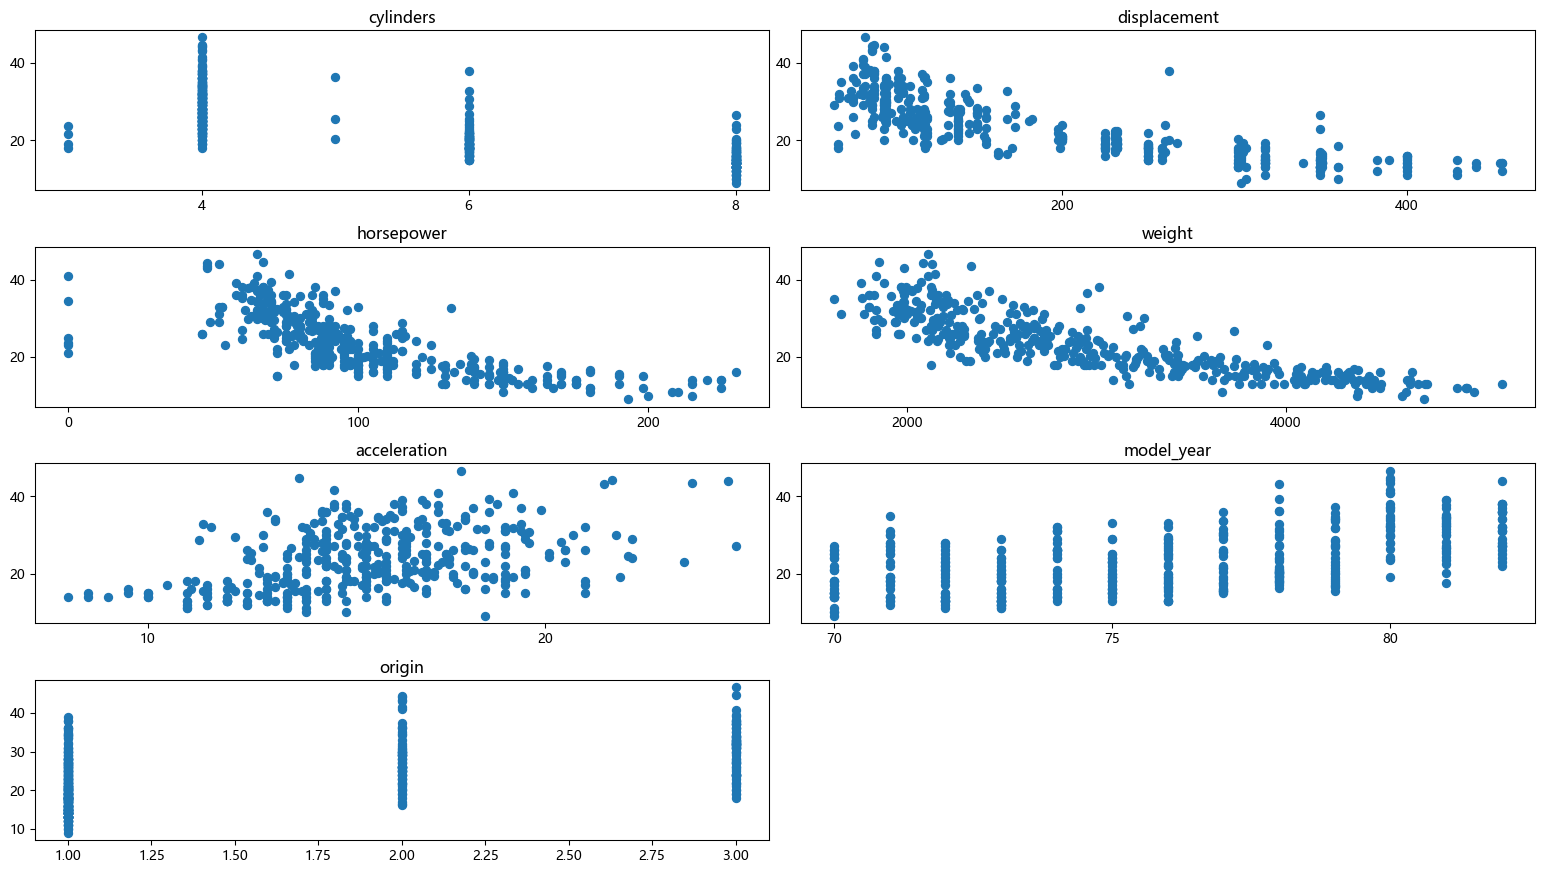

In [6]:
# %% 数据集预览
plt.figure()
fig, axes = plt.subplots()
for i in range(1, 8):
    axes.locator_params(nbins=3)
    axes = plt.subplot(4, 2, i)
    plt.title(list(datasets)[i])
    # 绘制数据散点图
    axes.scatter(datasets.iloc[:, i], y)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [7]:
# %% 数据预处理
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
# %% 构建双层全连接 DNN 模型
model = Sequential()
model.add(Dense(10, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1000, validation_split=0.33, shuffle=True, verbose=0)
score = metrics.mean_squared_error(model.predict(scaler.fit_transform(X_test)), y_test)
print(f'Total Mean Square Error: {score}')

Total Mean Square Error: 9.32799176332952
